# **Ex. 1 - kNN - own implementation**

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [6]:
iris = datasets.load_iris()  # loading the data
 
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3)
 
#An example of using the Euclidean distance
a = (1, 2, 3)
b = (4, 5, 6)

dst = distance.euclidean(a, b)
 
# Checking the effectiveness of the classifier
#output = accuracy_score(labels_test, predictions)

In [7]:
# knn algorithm:
def k_nearest_neighbors(x_train, y_train, x_test, k):
    lst = np.zeros((x_train.shape[0], 2))
    for i in range(x_train.shape[0]):
        d = distance.euclidean(x_train[i], x_test)
        lst[i, 0], lst[i, 1] = d, y_train[i]
    lst = lst[lst[:,0].argsort()]
    return lst[:k, :]

# defining the class based on given neighbors
def classification(neighbors):
    out_class = np.bincount(neighbors[:, 1].astype(int)).argmax()
    return out_class

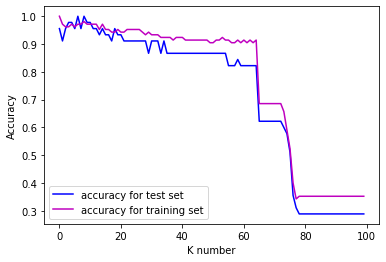

In [8]:
# To show the results, I check the outcome of my function for different 'k' numbers (from 1 to 100)
lst = []
k = 100

# test set
for i in range(k):
    predictions = []
    for j in range(features_test.shape[0]):
        neighbors = k_nearest_neighbors(features_train, labels_train, features_test[j], i+1)
        out = classification(neighbors)
        predictions.append(out)
    accuracy = accuracy_score(labels_test, predictions)
    lst.append(accuracy)

# training set
lst_2 = []
for i in range(k):
    predictions = []
    for j in range(features_train.shape[0]):
        neighbors = k_nearest_neighbors(features_train, labels_train, features_train[j], i+1)
        out = classification(neighbors)
        predictions.append(out)
    accuracy = accuracy_score(labels_train, predictions)
    lst_2.append(accuracy)

plt.plot(lst, '-b', label='accuracy for test set')  # accuracy of training and test data compared on one plot
plt.plot(lst_2, '-m', label='accuracy for training set')
plt.xlabel('K number')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.show()

**As we can see in the picture above, we achieve the best results at the beginning of the curve, when the 'k' number is 
quite small. We can assume, that somewhere between 3 to 10, the algorithm gives the best results.**

# **Ex. 2 - kNN - Python(sklern)**

In [9]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

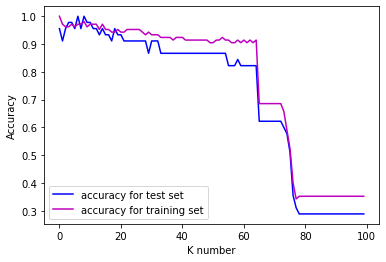

In [10]:
# there I compare results with my own implementation
classifier = KNeighborsClassifier(k)
classifier.fit(features_train, labels_train)
accuracy_k = classifier.score(features_test, labels_test)

lst = []
lst_2 = []
k = 100

for i in range(k):
    classifier = KNeighborsClassifier(i+1)  # create model
    classifier.fit(features_train, labels_train)
    accuracy = classifier.score(features_test, labels_test)  # test set
    lst.append(accuracy)
    accuracy_2 = classifier.score(features_train, labels_train)  # training set
    lst_2.append(accuracy_2)
    
    
plt.plot(lst, '-b', label='accuracy for test set')  # accuracy of training and test data compared on one plot
plt.plot(lst_2, '-m', label='accuracy for training set')
plt.xlabel('K number')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.show()

**As expected, both plots are the same, so it confirms, that my own implementation is correct.**

# **Ex.3 - Decision trees**

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [12]:
clf.predict(iris.data[:1, :])  # predicting examples

array([0])

In [13]:
clf.predict_proba(iris.data[:1, :])  # estimating probability

array([[1., 0., 0.]])

In [14]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("iris.pdf")  # pdf file created

True

**Exercise**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import cv2
 
 
 
# wczytywanie danych
dane = loadmat('mnist.mat')

In [2]:
#Ex.1.Divide the data into parameters X and answer y:
X = dane["trainX"]
y = dane["trainY"]
y = y.T

In [3]:
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
    
X_resized = np.zeros((X.shape[0], 400))  # there i start converting to 20x20 px
for i in range(X.shape[0]):
    resized = cv2.resize(X[i].reshape((28, 28)), (20, 20), interpolation = cv2.INTER_AREA)
    X_resized[i,:] = resized.flatten()
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 20
w = 20

In [4]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

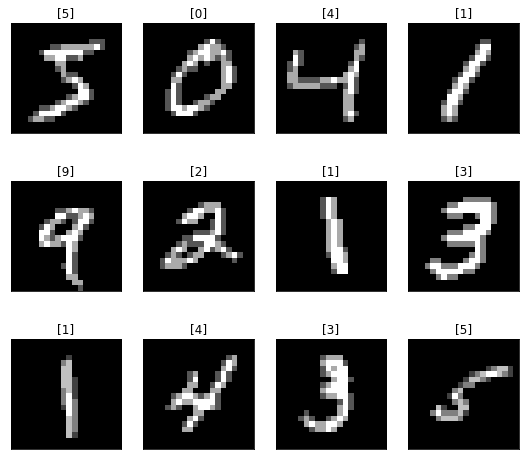

In [6]:
plot_mnist(X_resized[:12], y[:12], h, w)  # converted and normalized sample digits

**Ex. 4.**

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resized, y, test_size=0.3)  # splitting the data

**Ex. 5.**

In [8]:
# Training and predicting for test data, using decision tree
DEPTH = 10

decision_tree = tree.DecisionTreeClassifier(max_depth=DEPTH)
decision_tree.fit(X_train, Y_train)
predictions = decision_tree.predict(X_test)

**Ex. 6.**

In [9]:
f1_score(Y_test, predictions, average=None)  # F1 result

array([0.90822608, 0.93594646, 0.82713964, 0.79647965, 0.83811711,
       0.7933635 , 0.88870008, 0.88026424, 0.78188813, 0.76831897])

In [10]:
confusion_matrix(Y_test, predictions)  # confusion matrix

array([[1623,    2,   26,   44,   15,   28,   13,    4,   23,   14],
       [   0, 1958,   34,    7,    7,   12,    3,   17,   24,    7],
       [  29,   18, 1469,   45,   31,   16,   35,   28,   56,   30],
       [  15,   22,   78, 1448,   17,   96,    4,   36,   54,   79],
       [  10,    7,   12,   21, 1460,   24,   24,   19,   40,  156],
       [  23,   12,   18,  118,   27, 1315,   41,   12,   41,   40],
       [  27,    6,   33,   13,   25,   50, 1569,    5,   55,    9],
       [   8,   14,   43,   18,   23,    8,    1, 1599,   20,  141],
       [  18,   67,   64,   46,   24,   46,   42,    8, 1321,   70],
       [  29,    9,   18,   27,   82,   73,    7,   30,   39, 1426]],
      dtype=int64)

In [11]:
print(classification_report(Y_test, predictions))  # classification report

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1792
           1       0.93      0.95      0.94      2069
           2       0.82      0.84      0.83      1757
           3       0.81      0.78      0.80      1849
           4       0.85      0.82      0.84      1773
           5       0.79      0.80      0.79      1647
           6       0.90      0.88      0.89      1792
           7       0.91      0.85      0.88      1875
           8       0.79      0.77      0.78      1706
           9       0.72      0.82      0.77      1740

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.85      0.84      0.84     18000

